In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)


In [2]:
x1 = np.random.rand(4000)*10
x2 = np.random.rand(4000)*10
x3 = np.random.rand(4000)*10

x1_int = x1.astype(int) - 5
x2_int = x2.astype(int) - 5
x3_int = x3.astype(int) - 5

x1_str = x1_int.astype(str)
x2_str = x2_int.astype(str)
x3_str = x3_int.astype(str)

unique_expressions = set()

for i in range(len(x1)):
  n = np.random.rand(1)
  if n < 0.25:
    opp1 = " + "
    opp2 = " + "
  elif n > 0.25 and n < 0.5:
    opp1 = " + "
    opp2 = " - "
  elif n > 0.75:
    opp1 = " - "
    opp2 = " + "
  else:
    opp1 = " - "
    opp2 = " - "
  unique_expressions.add(x1_str[i] + opp1 + x2_str[i] + opp2 + x3_str[i])

x = list(unique_expressions) # Convert the set back to a list
print(x[0])
print(len(x))
diff_x = x

-2 + -1 - -2
2543


In [3]:
y = []

for expression in x:
  result = float(eval(expression))
  y.append(result)

print(y[0])
diff_y = y

-1.0


In [4]:
def tokenizer(input_list): # Changed parameter name to avoid confusion with global x
  #tokenizer by hand
  #tokens = (len(input_list), 5)
  # Create a copy of the input list to avoid modifying the original
  tokenized_x = [expression.split(" ") for expression in input_list]


  for i in range(len(tokenized_x)):
    for j in range(len(tokenized_x[i])):
      if j % 2 == 0:  # Check if the index is even
        tokenized_x[i][j] = np.float32(tokenized_x[i][j])
      else:  # The index is uneven, it's an operator
        if tokenized_x[i][j] == "+":
          tokenized_x[i][j] = np.float32(1)
        else:
          tokenized_x[i][j] = np.float32(0)
    padding_count = 15 - len(tokenized_x[i])
    for _ in range(padding_count): # Use a throwaway variable
      tokenized_x[i].append(np.float32(0.5))
  tokenized_x = np.array(tokenized_x)
  return tokenized_x
x = tokenizer(x)

In [5]:
model = keras.Sequential([
    keras.Input(shape = (len(x[0]),1)),
    keras.layers.SimpleRNN(50),      # No activation here, or use a standard one like "relu"
    keras.layers.PReLU(),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 50)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer = "adam", loss = "mse", metrics=['mse'])

In [7]:
x_train, x_val, y_train, y_val = \
    train_test_split(x, y, train_size=0.75)
x_train, x_val, y_train, y_val = \
    np.array(x_train), np.array(x_val), np.array(y_train), np.array(y_val)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32) # Use a batch size, e.g., 32
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(32) # Use the same batch size

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 23.2107 - mse: 23.2107 - val_loss: 17.4347 - val_mse: 17.4347
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.7715 - mse: 17.7715 - val_loss: 16.1466 - val_mse: 16.1466
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.7609 - mse: 15.7609 - val_loss: 11.5560 - val_mse: 11.5560
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4323 - mse: 11.4323 - val_loss: 6.7804 - val_mse: 6.7804
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5503 - mse: 6.5503 - val_loss: 4.5557 - val_mse: 4.5557
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7423 - mse: 4.7423 - val_loss: 3.7031 - val_mse: 3.7031
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3822 - mse: 3.3822 - val_loss: 2.4763 - val_mse: 2.4763
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3981 - mse: 2.3981 - val_loss: 1.5662 - val_mse: 1.5662
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

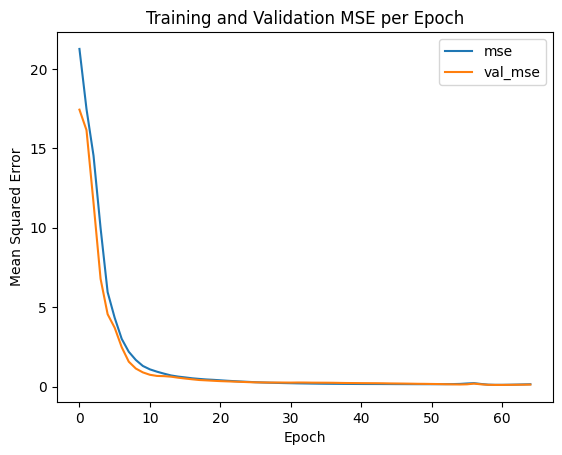

In [8]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='val_loss',
    mode = "min"
)

history = model.fit(
    train_dataset, # Pass the TensorFlow Dataset
    validation_data=val_dataset, # Pass the TensorFlow Dataset
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['mse', 'val_mse']].plot()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation MSE per Epoch")
plt.show()

In [11]:
model.predict(tokenizer(["1 + -5 + 6"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[2.5303352]], dtype=float32)